# Pre-settings

#DATA Preprocessing

학습에 사용할 데이터를 data/mp4/train 폴더에 넣은 후 아래 코드 돌려서 얼굴 crop한 이미지와 wav 파일 얻기


In [1]:
# check video duration and frame rate
import cv2
import os

videolist = os.listdir("obama_video_25")
videolist.sort()
for video in videolist:
    cap = cv2.VideoCapture(os.path.join("obama_video_25", video))
    fps1 = cap.get(cv2.CAP_PROP_FPS)
    total_frame1 = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap = cv2.VideoCapture(os.path.join("obama_video_clip", video))
    fps2 = cap.get(cv2.CAP_PROP_FPS)
    total_frame2 = cap.get(cv2.CAP_PROP_FRAME_COUNT)

FileNotFoundError: [Errno 2] No such file or directory: 'obama_video_25'

In [ ]:
# clip video length
import os
import cv2
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

videolist = os.listdir("obama_video_25")
videolist.sort()

origin_dir = "obama_video_25"
clip_dir = "obama_video_clip"

for video in videolist:
#     print(video)
    cap = cv2.VideoCapture(os.path.join(origin_dir, video))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    duration = total_frame / fps
#     print(fps)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
#change video frame rate from 30 to 25
import os
import subprocess
from tqdm import tqdm

file_list = os.listdir("obama_video_clip")
file_list.sort()
for file in tqdm(file_list):
    command = 'ffmpeg -i {} -filter:v fps=25 {}'.format(os.path.join("obama_video_clip", file), os.path.join("obama_video_25", file))
    subprocess.call(command, shell=True)

  0%|          | 1/304 [00:28<2:23:05, 28.34s/it]


KeyboardInterrupt: 

In [ ]:
#extract video frames
# warning! the number of extracted frames should be dividable by 5.
import os
import subprocess
from tqdm import tqdm
import shutil

file_list = os.listdir("obama_video_25")
file_list.sort()
# for file in tqdm(file_list):
file = "obama296.mp4"
vidname = file.split('.')[0]
video_path = os.path.join("preprocessed_data", "video", vidname)
full_frame_path = os.path.join(video_path, "full")
crop_frame_path = os.path.join(video_path, "crop")
audio_path = os.path.join(video_path, "audio")

os.makedirs(audio_path, exist_ok=True)
os.makedirs(full_frame_path, exist_ok=True)
os.makedirs(crop_frame_path, exist_ok=True)

# create full frame images : too large size
command = 'ffmpeg -hide_banner -y -i {} -r 25 {}'.format(os.path.join("obama_video_25", file), os.path.join(full_frame_path, '%05d.png'))
subprocess.call(command, shell=True)

# create audio file
command = 'ffmpeg -hide_banner -y -i {} {}'.format(os.path.join("obama_video_25", file), os.path.join(audio_path, 'audio.aac'))
subprocess.call(command, shell=True)

# create cropped frame
command = 'python utils/crop_portrait.py --data_dir {} --crop_level 1.3 --vertical_adjust 0.2'.format(video_path)
subprocess.call(command, shell=True)

#remove full frame images
shutil.rmtree(full_frame_path)
command = 'rm -rf ~/.local/share/Trash/files/*'
subprocess.call(command, shell=True)

0

In [7]:
from IPython.display import Video

#origin
# Video("obama_video_25/obama1.mp4")

# source audio
# Video("obama_video_25/obama10.mp4")

# #reenact
# Video("preprocessed_data/video/obama10/result.mp4")

# #debug
Video("data/kkj/kkj03/debug.mp4")

In [ ]:
from IPython.display import Video
Video("korean_data/KKJ_fast_00_stand.mp4")


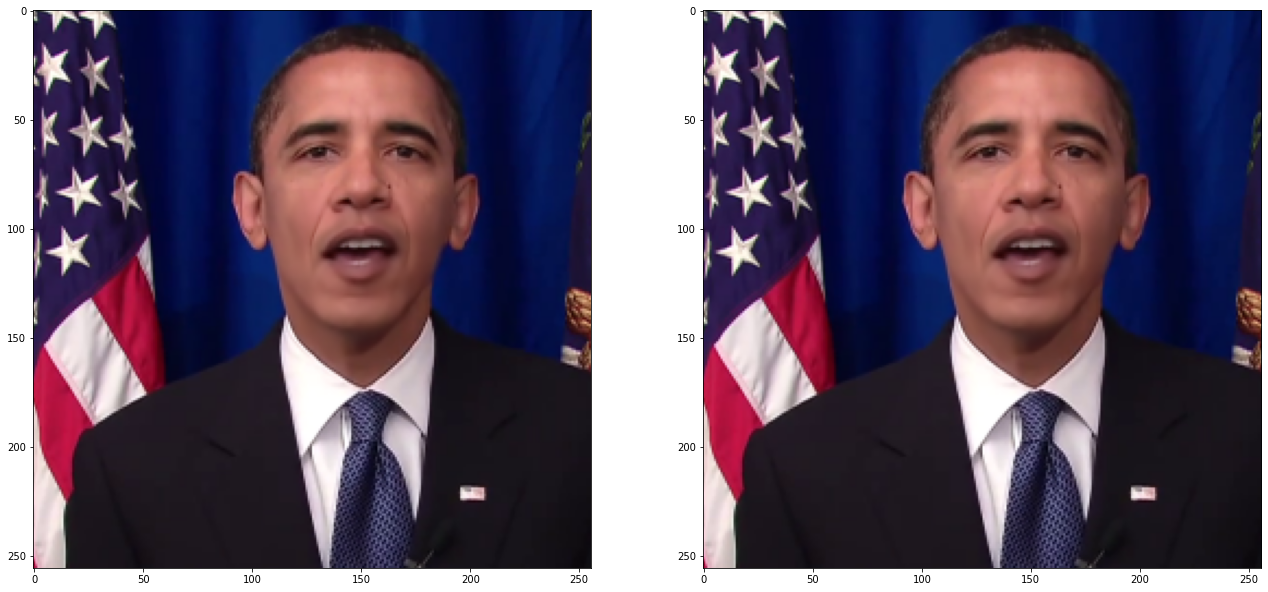

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils.util import create_dir, get_file_list


if __name__ == '__main__':
    src_dir = "preprocessed_data/video/obama10"
    tgt_dir = "preprocessed_data/video/obama296"

    foregrounds = get_file_list(os.path.join(src_dir, 'images'), suffix='fake')
    backgrounds = get_file_list(os.path.join(tgt_dir, 'crop'))
    masks = get_file_list(os.path.join(tgt_dir, 'mask'))

    i= 200
    fg = cv2.imread(foregrounds[i])
    bg = cv2.imread(backgrounds[i])
    
    
    mask_fg = cv2.cvtColor(fg.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    mask_fg = ((mask_fg > 0) * 255).astype(np.uint8)
    mask_fg = cv2.erode(mask_fg, np.ones((3,3), np.uint8), iterations=3)
    mask_fg = cv2.cvtColor(mask_fg, cv2.COLOR_GRAY2BGR)
    mask_fg = cv2.GaussianBlur(mask_fg, (5,5), cv2.BORDER_DEFAULT) / 255.0
    
    cover_img = mask_fg * fg + (1 - mask_fg) * bg

    mask = cv2.imread(masks[i])
    mask = cv2.erode(mask, np.ones((3,3), np.uint8), iterations=3)
    mask = cv2.GaussianBlur(mask, (5,5), cv2.BORDER_DEFAULT) / 255.0

    comp = mask * cover_img + (1 - mask) * bg
    result_fg = cover_img
    result_bg = comp
    result_fg = cv2.cvtColor(result_fg.astype(np.uint8), cv2.COLOR_BGR2RGB)
    result_bg = cv2.cvtColor(result_bg.astype(np.uint8), cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(22, 11))   # 직접 Figure 객체를 생성
    ax_fg = plt.subplot(1, 2, 1)   # 직접 axes를 생성
    ax_fg.imshow(result_fg)
    ax_bg = plt.subplot(1, 2, 2)
    ax_bg.imshow(result_bg)
    plt.show()

In [10]:
from audiodvp_utils import audio

wav = audio.load_wav("data/kkj/kkj03/audio/audio.aac", 16000)
mel = audio.melspectrogram(wav)

(3223211,)


In [42]:
import scipy.io as sio
import torch

A = torch.ones((64, 1))
mat_data = sio.loadmat('renderer/data/data.mat')
base = torch.from_numpy(mat_data['exp_base'])
baseT = base.T
m = baseT.matmul(base).inverse()
m.matmul(baseT).shape
B = base.matmul(A)

In [19]:
from audiodvp_utils.util import load_coef
import os

deltas = load_coef(os.path.join('data/kkj/kkj03', 'delta'))

100%|██████████| 4900/4900 [00:00<00:00, 7581.47it/s]


In [23]:
deltas[0].shape

torch.Size([64, 1])

In [2]:
from options.options import Options
from models.syncnet import SyncNet

opt = Options().parse_args()
model = SyncNet(opt).to('cuda')


In [45]:
a = deltas[10:15]
b = torch.stack(a, dim=0)
b = b.squeeze()
b.shape


torch.Size([5, 64])

In [47]:
!./scripts/demo.sh

++ target_dir=data/kkj/kkj03
++ source_dir=data/obama296
++ video_dir=data/kkj/kkj03/KKJ_slow_03_stand.mp4
++ start_time=00:00:00
++ end_time=240
++ python train_delta.py --dataset_mode audio_delta --num_epoch 100 --serial_batches False --display_freq 800 --print_freq 800 --batch_size 32 --lr 1e-3 --data_dir data/kkj/kkj03 --net_dir data/kkj/kkj03
100%|█████████████████████████████████████| 4900/4900 [00:00<00:00, 8027.38it/s]
Length of mel chunks: 5033
dataset [AudioDeltaDataset] was created
(epoch: 0, iters: 800, data: 0.272, comp: 0.012) Delta: 0.058108222 Sync: 23.891921997 
(epoch: 0, iters: 1600, data: 0.002, comp: 0.012) Delta: 0.031697463 Sync: 23.698648453 
(epoch: 0, iters: 2400, data: 0.002, comp: 0.012) Delta: 0.022096399 Sync: 22.982053757 
(epoch: 0, iters: 3200, data: 0.002, comp: 0.012) Delta: 0.013223371 Sync: 22.762281418 
(epoch: 0, iters: 4000, data: 0.002, comp: 0.012) Delta: 0.012563409 Sync: 24.699600220 
(epoch: 0, iters: 4800, data: 0.002, comp: 0.012) Delta: 0